In [6]:
from fastbook import *
import os

In [54]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1, 'https://jooinn.com/images/colorful-parrot-7.jpg')

In [55]:
dest = Path('bird.jpg')
if not dest.exists(): 
    download_url(urls[0], dest, show_progress=False)

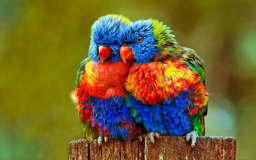

In [56]:
im = Image.open(dest)
im.to_thumb(256,256)


In [41]:
searches = 'forest', 'bird'
path = Path('bird_or_not')
if not path.exists():
    path.mkdir(exist_ok=True)
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)
        

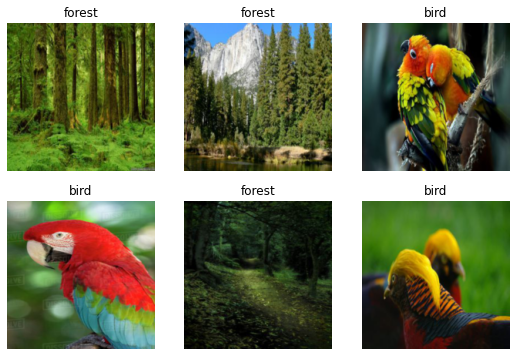

In [48]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [49]:
learn = vision_learner(dls, arch=resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.798780,1.013906,0.298701,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.085609,0.113115,0.012987,00:32
1,0.072132,0.073908,0.025974,00:35
2,0.051498,0.073004,0.025974,00:33


In [58]:
is_bird, _,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9965
